In [1]:
%matplotlib notebook

In [2]:
import cv2
import pandas as pd
from os.path import isfile
from pylab import *

In [3]:
video_file = "vtron/unfamiliar_driver/relaxed/360_view/GS010053_0_to_60s.mp4"
excel_file = "vtron/unfamiliar_driver/relaxed/Unfamiliar_Driver_Relaxed.xlsx"

In [4]:

# helper class for an interactive plot with a cross-hair
class SnaptoCursor(object):
    """
    Like Cursor but the crosshair snaps to the nearest x,y point
    For simplicity, I'm assuming x is sorted
    """

    def __init__(self, ax, x, y, video):
        self.ax = ax
        self.lx = ax.axhline(color='k')  # the horiz line
        self.ly = ax.axvline(color='k')  # the vert line
        self.x = x
        self.y = y
        self.video = video
        # text location in axes coords
        self.txt = ax.text(0.7, 0.9, '', transform=ax.transAxes)
        
    def __del__(self):
        print("destructor called")
       #video.release()

    def mouse_move(self, event):

        if not event.inaxes:
            return

        x, y = event.xdata, event.ydata

        indx = searchsorted(self.x, [x])[0]
        x = self.x[indx]
        y = self.y[indx]
        # update the line positions
        self.lx.set_ydata(y)
        self.ly.set_xdata(x)

        self.txt.set_text('x=%1.2f, y=%1.2f' % (x, y))
        print('x=%1.2f, y=%1.2f' % (x, y))
        draw()
        
        # seek to the selected position in the video file
        video.set(cv2.CAP_PROP_POS_MSEC, x*1000)
        # Frame acquisition
        (_, frame) = video.read()  

        frame_output = cv2.resize(frame, (round(0.25*frame.shape[1]), round(0.25*frame.shape[0])))
    
        # show output
        cv2.imshow('ball_tracker', frame_output)
        
        # process events
        cv2.waitKey(1)

In [5]:

if isfile('data_cached.npy'):
    data = load('data_cached.npy', allow_pickle=True)
else:
    print("wait while loading excel file - this will take a few seconds.")
    data_xls = pd.read_excel(excel_file,engine='openpyxl')
    data = array(data_xls)
    save('data_cached.npy', data)
    

In [6]:
start_row = 6;

In [7]:
fps = int(1/0.02) # data in xls file seems to be recorded at roughly 50 fps

header_strings = data[5,:]

time = data[start_row: start_row + 60 * fps ,0]

idx = where(header_strings == 'V_BRAKE_POSITION')

paddle = data[start_row: start_row + 60 * fps , idx[0][0]]

In [8]:
video = cv2.VideoCapture(video_file)

<IPython.core.display.Javascript object>


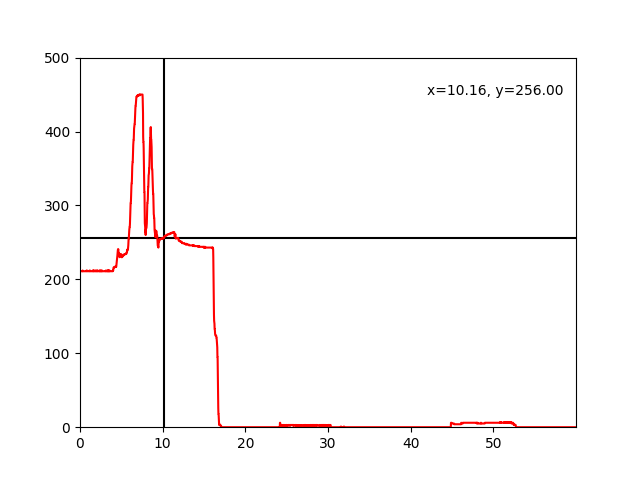

9

In [9]:
fig, ax = plt.subplots()
cursor = SnaptoCursor(ax, time, paddle, video)
plt.connect('motion_notify_event', cursor.mouse_move)

In [ ]:
ax.plot(time, paddle, 'r')
plt.axis([0, time[-1], 0, 500])
plt.show()